In [1]:
import vaex
import numpy as np
from glob import glob
from time import time
from os.path import join, abspath
from os import pardir, mkdir
import sys
from matplotlib import pyplot as plt

In [2]:
# import utils
top_dir = join(abspath(pardir))
if not top_dir in sys.path:
    sys.path.insert(0, top_dir)
sys.path

['/home2/s20321005/Thesis-Project',
 '/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages']

In [3]:
from utils import progressbar, safe_mkdir

In [4]:
# root data dir
root_data_dir = abspath(join(top_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
# create directory for the best parameters
name = "Best-Pars"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)
data_dir

Directory /home2/s20321005/Thesis-Project/Data/Best-Pars already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Best-Pars'

In [6]:
# load combined data
name = "rave-galah-lamost-apogee"
combine_data_dir = join(root_data_dir, 'Combine', name)
combine_data_dir

'/home2/s20321005/Thesis-Project/Data/Combine/rave-galah-lamost-apogee'

In [7]:
# see the data
files = glob(join(combine_data_dir, "*.hdf5"))
files.sort()
data = vaex.open_many(files)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,rv_galah,e_rv_galah,feh_galah,alphafe_galah,teff_galah,e_teff_galah,logg_galah,e_logg_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [8]:
data.column_names

['ra',
 'dec',
 'Jmag',
 'Kmag',
 'ph_qual',
 'source_id',
 'pm',
 'pmra',
 'e_pmra',
 'pmdec',
 'e_pmdec',
 'parallax',
 'e_parallax',
 'gmag',
 'bpmag',
 'rpmag',
 'fb_over_err',
 'fr_over_err',
 'ruwe',
 'excess_factor',
 'rv_gaia',
 'e_rv_gaia',
 'GLON',
 'GLAT',
 'teff_gspphot',
 'teff_gspphot_lower',
 'teff_gspphot_upper',
 'logg_gspphot',
 'logg_gspphot_lower',
 'logg_gspphot_upper',
 'mh_gspphot',
 'mh_gspphot_lower',
 'mh_gspphot_upper',
 'distance_gspphot',
 'distance_gspphot_lower',
 'distance_gspphot_upper',
 'ag_gspphot',
 'ag_gspphot_lower',
 'ag_gspphot_upper',
 'mh_gspspec',
 'mh_gspspec_lower',
 'mh_gspspec_upper',
 'alphafe_gspspec',
 'alphafe_gspspec_lower',
 'alphafe_gspspec_upper',
 'fem_gspspec',
 'fem_gspspec_lower',
 'fem_gspspec_upper',
 'spectraltype_esphs',
 'rv_rave',
 'e_rv_rave',
 'teff_rave',
 'logg_rave',
 'mh_rave',
 'alphafe_rave',
 'rv_galah',
 'e_rv_galah',
 'feh_galah',
 'alphafe_galah',
 'teff_galah',
 'e_teff_galah',
 'logg_galah',
 'e_logg_galah'

# Reality Check

Not all catalogs are created equal. Some catalogs are more complete than others. Some catalogs are more accurate than others.

Let's examine the details of the catalogs we are using.

| pars        | Gaia | gspphot | gspspec | rave | galah | lamost | apogee |
| ----------- | ---- | ------- | ------- | ---- | ----- | ------ | ------ |
| rv          |  x   |         |         |   x  |   x   |    x   |   x    |
| `e_rv`      | `x`  |         |         |  `x` |  `x`  |   `x`  |  `x`   |
| teff        |      |    x    |         |   x  |   x   |    x   |   x    |
| `e_teff`    |      |  `xx`   |         |      |  `x`  |   `x`  |  `x`   |
| logg        |      |    x    |         |   x  |   x   |    x   |   x    |
| `e_logg`    |      |  `xx`   |         |      |  `x`  |   `x`  |  `x`   |
| feh         |      |         |         |      |   x   |    x   |   x    |
| `e_feh`     |      |         |         |      |       |   `x`  |  `x`   |
| mh          |      |    x    |   x     |   x  |       |        |   x    |
| `e_mh`      |      |  `xx`   |  `xx`   |      |       |        |  `x`   |
| fem         |      |         |   x     |      |       |        |        |
| `e_fem`     |      |         |  `xx`   |      |       |        |        |
| alphafe     |      |         |   x     |   x  |   x   |        |        |
| `e_alphafe` |      |         |  `xx`   |      |       |        |        |
| alpham      |      |         |         |      |       |    x   |   x    |
| `e_alpham`  |      |         |         |      |       |   `x`  |  `x`   |
| dist        |      |    x    |         |      |       |        |        |
| `e_dist`    |      |   `xx`  |         |      |       |        |        |
| ag          |      |    x    |         |      |       |        |        |
| `e_ag`      |      |   `xx`  |         |      |       |        |        |


`xx` means there are upper and lower limits.

The most basic questions are
1. How to select the best parameters for a given star?
2. What's the difference between $\text{M}$ and $\text{Fe}$? Are they actually the same thing?

let's investigate the first question.

**Naive Approach** 

Just calculate the weighted average. This method is simple but not robust.

**Better Approach**

let's say we have N catalogs for parameters a. Here's the procedure:

1. If N=1, then select the only catalog.
2. If N=2, check wether both catalogs have uncertainties. 
    * If yes, then select the catalog with the smaller uncertainty.
    * If no, then select the catalog with uncertainties.
3. If N>2, again, filter out the catalogs without uncertainties. Let there are M catalogs left.
    * If M=1, then select the only catalog.
    * If M=2, then select the catalog with the smaller uncertainty.
    * If M>2, then calculate their weighted average. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are K catalogs left.
        * If K=0, then select the catalog with the smaller uncertainty from M.
        * If K=1, then select the only catalog.
        * If K>2, then select the catalog with the smaller uncertainty.

The third criteria is used to filter out the catalogs that are not reliable. Other catalogs were used to corroborate the best estimate.

The weight is calculated as $w_i = \frac{1}{\sigma_i^2}$.

And if there are upper and lower $\sigma$, calculate the effective $\sigma$ as $\sigma_i = \sqrt{\sigma_i^+ \sigma_i^-}$.

Experiment

In [180]:
import pandas as pd

# mock catalogs
catalogs = ["a", "b", "c", "d", "e"]
data = {}
rows = 100
for catalog in catalogs:
    # randomly selected m rows as None, at most 50% of the rows
    m = rows - np.random.randint(0, np.floor(rows*0.5).astype(int))

    # Create an array with all True values
    setNone = np.full(rows, True)

    # Set m random values to False
    setNone[np.random.choice(rows, m, replace=False)] = False

    # Create an array of length N with random values
    p = np.random.randn(rows)+5
    ep = np.random.randn(rows)**2
    ep_upper = np.random.randn(rows)**2

    # Set values in my_array to None where arr is True
    p[setNone] = None
    ep[setNone] = None
    if not catalog in ["d", "e"]:
        d = {f"p_{catalog}": p, f"e_p_{catalog}": ep}
    # catalogs d has no uncertainty
    elif catalog == "d":
        d = {f"p_{catalog}": p}
    # catalogs e has upper and lower values
    else:
        d = {f"p_{catalog}": p, f"p_{catalog}_lower": p-ep, f"p_{catalog}_upper": p+ep_upper}
    data.update(d)

df = pd.DataFrame(data)
df

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper
0,6.047914,0.147754,6.560734,0.105575,3.967774,2.372239,4.013093,NaN,NaN,NaN
1,5.312857,0.832989,5.266696,0.016170,5.907332,0.198270,4.738887,4.557447,3.413707,5.068309
2,3.470026,0.800165,3.448840,0.426934,NaN,NaN,4.425902,4.612223,2.297146,5.487752
3,5.403401,0.297169,6.198020,1.932712,4.616781,0.052021,4.882027,5.589271,5.581508,5.905538
4,5.963685,2.444398,6.556958,3.385710,5.771103,1.075891,4.854049,5.482341,5.345124,5.520206
...,...,...,...,...,...,...,...,...,...,...
95,4.469280,0.755339,NaN,NaN,4.807740,0.053910,4.443859,NaN,NaN,NaN
96,6.857128,0.662980,5.971388,3.006054,NaN,NaN,5.377374,6.308244,4.881889,6.888316
97,6.147862,1.614381,NaN,NaN,4.059319,0.002791,3.535561,NaN,NaN,NaN
98,3.789465,0.774673,6.374432,0.471772,5.488887,1.863085,NaN,NaN,NaN,NaN


In [149]:
# change the first row to None except for p_b and e_p_b
for col in df.columns:
    if not col in ["p_b", "e_p_b"]:
        df.loc[0, col] = None
    if not col in ["p_b", "e_p_b", "p_d"]:
        df.loc[5, col] = None
df[:10]

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper
0,NaN,NaN,5.631811,1.347625,NaN,NaN,NaN,NaN,NaN,NaN
1,5.323361,0.285841,3.404092,1.048328,5.720834,0.066097,4.813255,6.012579,5.042866,6.712576
2,5.898111,4.774583,6.014635,0.066699,NaN,NaN,2.934087,3.667190,3.227620,3.740417
3,5.156259,0.262507,NaN,NaN,NaN,NaN,5.389533,3.954414,3.272841,5.944132
4,4.036872,0.014642,NaN,NaN,NaN,NaN,3.694607,4.916049,4.914918,4.972522
5,NaN,NaN,6.910569,0.111996,NaN,NaN,NaN,NaN,NaN,NaN
6,7.297497,0.007371,NaN,NaN,4.872469,0.000044,5.202438,5.823727,5.515169,5.876306
7,4.375359,0.081423,NaN,NaN,NaN,NaN,4.172299,5.396396,5.315162,6.682889
8,NaN,NaN,NaN,NaN,5.687031,0.000286,4.415748,5.824775,5.757863,6.426581
9,4.939021,0.485777,4.116037,0.057304,NaN,NaN,4.988023,4.971456,4.958934,5.276347


How do we handle it?

We are going to iterate over each rows. Here are the steps:

1. Create a dict cats, where it contains this signature: 
```
cats = {
    name: str, 
    value: float, 
    e_value_upper: float, 
    e_value_lower: float, 
    e_effective: float,
    sym: bool
}[]
```
1. desc:
    * name: the name of the catalog
    * value: the (median/mean/mode/best) value of the parameter
    * e_value_upper: the upper uncertainty of the parameter
    * e_value_lower: the lower uncertainty of the parameter
    * sym: whether the uncertainties are symmetric 
2. Check the length of non-null values of cats. If it's 1, then select the only catalog.
3. If it's 2, check wether both catalogs have uncertainties. 
    * If yes, then select the catalog with the smaller uncertainty.
    * If no, then select the catalog with uncertainties.
4. If it's >2, again, filter out the catalogs without uncertainties. Let there are M catalogs left.
    * If M=1, then select the only catalog.
    * If M=2, then select the catalog with the smaller uncertainty.
    * If M>2, then calculate their weighted average. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are K catalogs left.
        * If K=1, then select the only catalog.
        * If K=2, then select the catalog with the smaller uncertainty.
        * If K>2, calculate the weighted average again. Assume the weighted average is $a_{\text{avg}}$. Then filter again the catalogs that's contain $a_{\text{avg}}$ inside their $[a_i-2\sigma^{-}_{a,i},a_i+2\sigma^{+}_{a,i}]$  range. Let there are L catalogs left.
            * If L=0, then select the catalog with the smaller uncertainty from M.
            * If L=1, then select the only catalog.
            * If L>1, then select the catalog with the smaller uncertainty.


In [181]:
def assign(cat, keys):
    return [cat[key] for key in keys]

def best_pars(row, catalogs, par="p"):
    best_val = np.nan
    best_cat = np.nan
    best_el = np.nan
    best_eu = np.nan
    best_sym = np.nan
    keys = ["name", "value", "e_value_lower", "e_value_upper", "sym"]
    cats = []
    for catalog in catalogs:
        c = {
            "name": catalog['name'], 
            "value": row[catalog['value']] if catalog['value'] != None else np.nan, 
            "e_value_upper": row[catalog['e_value_upper']] if catalog['e_value_upper'] != None else np.nan, 
            "e_value_lower": row[catalog['e_value_lower']] if catalog['e_value_lower'] != None else np.nan,
            "e_effective": row[catalog['e_value_upper']] if catalog['e_value_upper'] != None else np.nan, 
            "sym": catalog['sym'] if catalog['sym'] != None else np.nan
        }
        if catalog['sym'] == False:
            c['e_value_upper'] = c['e_value_upper'] - c['value']
            c['e_value_lower'] = c['value'] - c['e_value_lower']
            c['e_effective'] = np.sqrt([c['e_value_upper']*c['e_value_lower']][0])
        cats.append(c)
    cats_filtered = [c for c in cats if not np.isnan(c['value'])]
    
    if len(cats_filtered) == 1:
        cat = cats_filtered[0]
        best_cat, best_val, best_el, best_eu, best_sym= assign(cat, keys)
    elif len(cats_filtered) > 1:
        cats_filtered_2 = [c for c in cats_filtered if not np.isnan(c['e_value_upper'])]
        if len(cats_filtered_2) == 1:
            cat = cats_filtered_2[0]
            best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys)
        elif len(cats_filtered_2) == 2:
            minarg = np.argmin([c['e_effective'] for c in cats_filtered_2])
            cat = cats_filtered_2[minarg]
            best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
        elif len(cats_filtered_2) > 2:
            weights = np.array([1/c['e_effective']**2 for c in cats_filtered_2])
            avg = np.average([c['value'] for c in cats_filtered_2], weights=weights)
            m = 2
            mask = (avg > np.array([c['value']-m*c['e_value_lower'] for c in cats_filtered_2])) * (avg < np.array([c['value']+m*c['e_value_upper'] for c in cats_filtered_2]))
            cats_filtered_3 = np.array(cats_filtered_2)[mask]
            if len(cats_filtered_3) == 0:
                minarg = np.argmin([c['e_effective'] for c in cats_filtered_2])
                cat = cats_filtered_2[minarg]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
            elif len(cats_filtered_3) == 1:
                cat = cats_filtered_3[0]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys)
            else:
                minarg = np.argmin([c['e_effective'] for c in cats_filtered_3])
                cat = cats_filtered_3[minarg]
                best_cat, best_val, best_el, best_eu, best_sym = assign(cat, keys) 
    row[f'{par}'] = best_val
    row[f'{par}_cat'] = best_cat
    row[f'{par}_el'] = best_el
    row[f'{par}_eu'] = best_eu
    row[f'{par}_sym'] = best_sym
    return row

catalogs = [
    {"name": "a", "value": "p_a", "e_value_upper": "e_p_a", "e_value_lower": "e_p_a", "sym": True},
    {"name": "b", "value": "p_b", "e_value_upper": "e_p_b", "e_value_lower": "e_p_b", "sym": True},
    {"name": "c", "value": "p_c", "e_value_upper": "e_p_c", "e_value_lower": "e_p_c", "sym": True},
    {"name": "d", "value": "p_d", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "e", "value": "p_e", "e_value_upper": "p_e_upper", "e_value_lower": "p_e_lower", "sym": False},
]

df.apply(best_pars, axis=1, args=(catalogs, "p"))

,p_a,e_p_a,p_b,e_p_b,p_c,e_p_c,p_d,p_e,p_e_lower,p_e_upper,p,p_cat,p_el,p_eu,p_sym
0,6.047914,0.147754,6.560734,0.105575,3.967774,2.372239,4.013093,NaN,NaN,NaN,6.560734,b,0.105575,0.105575,True
1,5.312857,0.832989,5.266696,0.016170,5.907332,0.198270,4.738887,4.557447,3.413707,5.068309,5.266696,b,0.016170,0.016170,True
2,3.470026,0.800165,3.448840,0.426934,NaN,NaN,4.425902,4.612223,2.297146,5.487752,3.448840,b,0.426934,0.426934,True
3,5.403401,0.297169,6.198020,1.932712,4.616781,0.052021,4.882027,5.589271,5.581508,5.905538,5.403401,a,0.297169,0.297169,True
4,5.963685,2.444398,6.556958,3.385710,5.771103,1.075891,4.854049,5.482341,5.345124,5.520206,5.482341,e,0.137217,0.037865,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.469280,0.755339,NaN,NaN,4.807740,0.053910,4.443859,NaN,NaN,NaN,4.807740,c,0.053910,0.053910,True
96,6.857128,0.662980,5.971388,3.006054,NaN,NaN,5.377374,6.308244,4.881889,6.888316,6.857128,a,0.662980,0.662980,True
97,6.147862,1.614381,NaN,NaN,4.059319,0.002791,3.535561,NaN,NaN,NaN,4.059319,c,0.002791,0.002791,True
98,3.789465,0.774673,6.374432,0.471772,5.488887,1.863085,NaN,NaN,NaN,NaN,6.374432,b,0.471772,0.471772,True


## Second question

What's the difference between $\text{M}$ and $\text{Fe}$? Are they actually the same thing?

Let's examine each catalogs.

### Gaia

There are two models for the metallicity for Gaia, GSP-PHOT and GSP-SPEC. Pretty much self explanatory. 

### RAVE

rave has `mh` column. This is THE metallicity, means all metal elements.

### GALAH

galah has `feh` column. 



look at each parameters first.


## rv
* Gaia, rave, galah, lamost, apogee
only rave doesn't have uncertainties.


In [223]:
u = {"a": 1, "b": 2, "c": 3, "d": 4, "e": 5}
for v in u.values():
    print(v)

1
2
3
4
5


In [224]:
catalogs_rv = [
    {"name": "gaia", "value": "rv_gaia", "e_value_upper": "e_rv_gaia", "e_value_lower": "e_rv_gaia", "sym": True},
    {"name": "rave", "value": "rv_rave", "e_value_upper": "e_rv_rave", "e_value_lower": "e_rv_rave", "sym": True},
    {"name": "galah", "value": "rv_galah", "e_value_upper": "e_rv_galah", "e_value_lower": "e_rv_galah", "sym": True},
    {"name": "lamost", "value": "rv_lamost", "e_value_upper": "e_rv_lamost", "e_value_lower": "e_rv_lamost", "sym": True},
    {"name": "apogee", "value": "rv_apogee", "e_value_upper": "e_rv_apogee", "e_value_lower": "e_rv_apogee", "sym": True},    
]

catalogs_teff = [
    {"name": "gspphot", "value": "teff_gspphot", "e_value_upper": "teff_gspphot_upper", "e_value_lower": "teff_gspphot_lower", "sym": False},
    {"name": "rave", "value": "teff_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "galah", "value": "teff_galah", "e_value_upper": "e_teff_galah", "e_value_lower": "e_teff_galah", "sym": True},
    {"name": "lamost", "value": "teff_lamost", "e_value_upper": "e_teff_lamost", "e_value_lower": "e_teff_lamost", "sym": True},
    {"name": "apogee", "value": "teff_apogee", "e_value_upper": "e_teff_apogee", "e_value_lower": "e_teff_apogee", "sym": True},
]
catalogs_logg = [
    {"name": "gspphot", "value": "logg_gspphot", "e_value_upper": "logg_gspphot_upper", "e_value_lower": "logg_gspphot_lower", "sym": False},
    {"name": "rave", "value": "logg_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "galah", "value": "logg_galah", "e_value_upper": "e_logg_galah", "e_value_lower": "e_logg_galah", "sym": True},
    {"name": "lamost", "value": "logg_lamost", "e_value_upper": "e_logg_lamost", "e_value_lower": "e_logg_lamost", "sym": True},
    {"name": "apogee", "value": "logg_apogee", "e_value_upper": "e_logg_apogee", "e_value_lower": "e_logg_apogee", "sym": True},
]
catalogs_feh = [
    {"name": "galah", "value": "feh_galah", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "lamost", "value": "feh_lamost", "e_value_upper": "e_feh_lamost", "e_value_lower": "e_feh_lamost", "sym": True},
    {"name": "apogee", "value": "feh_apogee", "e_value_upper": "e_feh_apogee", "e_value_lower": "e_feh_apogee", "sym": True},
]

catalogs_mh = [
    {"name": "gspphot", "value": "mh_gspphot", "e_value_upper": "mh_gspphot_upper", "e_value_lower": "mh_gspphot_lower", "sym": False},
    {"name": "gspspec", "value": "mh_gspspec", "e_value_upper": "mh_gspspec_upper", "e_value_lower": "mh_gspspec_lower", "sym": False},
    {"name": "rave", "value": "mh_rave", "e_value_upper": None, "e_value_lower": None, "sym": None},
    {"name": "apogee", "value": "mh_apogee", "e_value_upper": "e_mh_apogee", "e_value_lower": "e_mh_apogee", "sym": True},
]

catalogs = {
    "rv": catalogs_rv,
    "teff": catalogs_teff,
    "logg": catalogs_logg,
    "feh": catalogs_feh,
}

for file in files:
    df_vaex = vaex.open(file)
    df_vaex = df_vaex
    t0 = time()
    df = df_vaex.to_pandas_df()
    # df = df[:4000]
    # create empty dataframe
    df_com = pd.DataFrame()
    M = 100
    # iterate dataframe into chunks
    tot = len(df)//M
    cols = np.array([])
    for catalog in catalogs.values():
        col = np.array([[c['value'], c["e_value_upper"], c["e_value_lower"]] for c in catalog]).flatten()
        col = np.unique(col[col != None])
        cols = np.append(cols, col)    

    for i, df_chunk in df.groupby(df.index // M):
        t1 = time()
        # print(i, len(df_chunk))
        # iterate chunks into catalogs
        for par, catalog in catalogs.items():
            df_chunk = df_chunk.apply(best_pars, axis=1, args=(catalog, par))
        if len(df_com) == 0:
            df_com = df_chunk
        else:
            df_com = pd.concat([df_com, df_chunk])            
        if i == 3:
            break  
        progressbar(i/tot*100, info=f"{np.round(t1-t0,2)} s", flush=True)
    df_com.drop(columns=cols, inplace=True) 
    # df = df.apply(best_pars, axis=1, args=(catalogs_rv, "rv"))
    break
df_com  

[                                                  ] 0% 2.09 s

,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,...,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.717230,17.611683,0.017650,-6.337455,...,4.4943,gspphot,0.0062,0.0048,False,NaN,NaN,NaN,NaN,NaN
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609581,0.014361,-5.888884,...,2.0187,gspphot,0.2598,0.0247,False,NaN,NaN,NaN,NaN,NaN
2,0.392894,-89.286575,12.769,12.330,AAA,4611779756091083008,6.918577,4.898140,0.015574,-4.886198,...,4.3541,gspphot,0.0064,0.0065,False,NaN,NaN,NaN,NaN,NaN
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.335455,2.758185,0.015947,1.875548,...,4.2543,gspphot,0.0126,0.0126,False,NaN,NaN,NaN,NaN,NaN
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909172,0.014310,-2.105829,...,4.2041,gspphot,0.0071,0.0068,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.024475,-78.659286,13.155,12.596,AAA,4635634829086266112,17.914886,11.023372,0.025100,-14.121913,...,4.4972,gspphot,0.0350,0.0103,False,NaN,NaN,NaN,NaN,NaN
396,0.062653,-78.098969,12.772,12.126,AAA,4683749457917473920,10.411634,10.407092,0.019708,0.307534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,0.094364,-78.986633,13.068,12.630,AAA,4635611498823926272,12.372120,8.547390,0.019644,-8.944913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,0.107159,-78.017227,12.114,11.770,AAA,4683762411538833664,11.178308,-2.444910,0.013992,-10.907657,...,4.1103,gspphot,0.0096,0.0432,False,-0.407773,galah,NaN,NaN,NaN


In [225]:
vaex.from_pandas(df_com)

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,mh_rave,alphafe_rave,alphafe_galah,subclass_lamost,alpham_lamost,e_alpham_lamost,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,-0.5550000071525574,-0.5717999935150146,-0.5386000275611877,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,152.84475708007812,gaia,4.919384002685547,4.919384002685547,True,5675.6103515625,gspphot,11.37353515625,13.83251953125,False,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,False,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,0.11720000207424164,0.1111999973654747,0.11999999731779099,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,0.17000000178813934,0.1599999964237213,0.1899999976158142,-0.05000000074505806,-0.05000000074505806,-0.03999999910593033,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,30.259687423706055,gaia,0.167822003364563,0.167822003364563,True,4251.74755859375,gspphot,142.98876953125,39.806640625,False,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,False,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,-0.2969000041484833,-0.3043999969959259,-0.2904999852180481,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.28650951385498,gaia,6.514820575714111,6.514820575714111,True,5750.4326171875,gspphot,5.1650390625,4.8857421875,False,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,False,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,-0.36550000309944153,-0.3711000084877014,-0.35989999771118164,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006

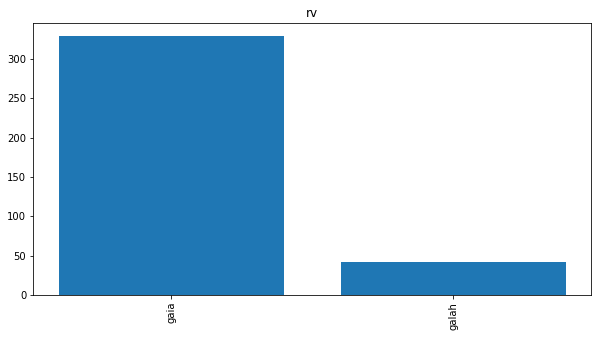

          rv                                             
       count       mean        std        min         max
rv_cat                                                   
gaia     329  17.600533  46.762837 -87.458641  283.845062
galah     42  12.609470  32.072070 -68.207001  111.444000


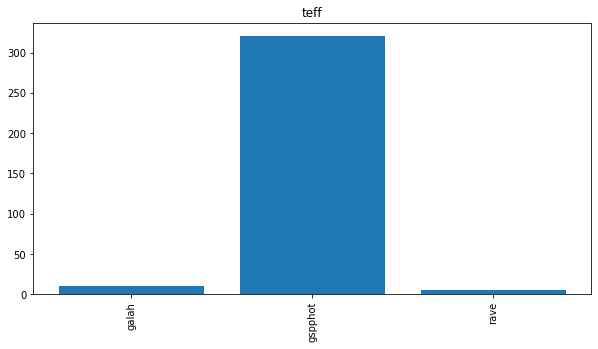

          teff                                                    
         count         mean          std          min          max
teff_cat                                                          
galah       10  4661.251940   268.065421  4208.318000  5036.053000
gspphot    321  5342.117171   664.599972  3156.387695  8170.015137
rave         6  5334.166667  1541.511390  4177.000000  8326.000000


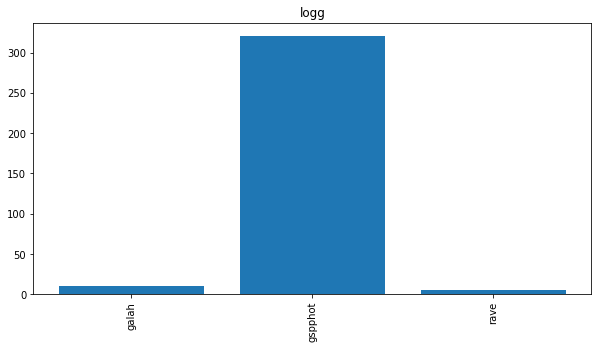

          logg                                        
         count      mean       std       min       max
logg_cat                                              
galah       10  2.563488  0.656030  1.410275  3.447012
gspphot    321  4.064438  0.613954  1.185300  4.996300
rave         6  2.263333  0.891508  1.200000  3.560000


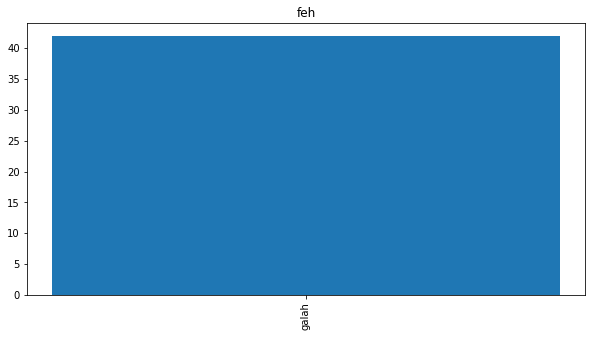

          feh                                        
        count      mean       std       min       max
feh_cat                                              
galah      42 -0.218517  0.291289 -0.892424  0.277632


In [229]:
# group by catalog
for par, catalog in catalogs.items():
    df_group = df_com.groupby(f'{par}_cat').agg({par: ['count', 'mean', 'std', 'min', 'max']})
    plt.figure(figsize=(10,5))
    plt.bar(df_group[par]['count'].index, df_group[par]['count'].values)
    plt.xticks(rotation=90)
    plt.title(par)
    plt.show()
    print(df_group)


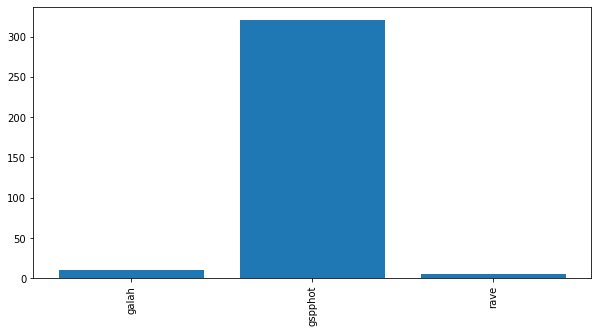

teff                                                    
         count         mean          std          min          max
teff_cat                                                          
galah       10  4661.251940   268.065421  4208.318000  5036.053000
gspphot    321  5342.117171   664.599972  3156.387695  8170.015137
rave         6  5334.166667  1541.511390  4177.000000  8326.000000

In [227]:
# group by teff_cat
df_group = df_com.groupby('teff_cat').agg({'teff': ['count', 'mean', 'std', 'min', 'max']})
# plot counts of each catalog

plt.figure(figsize=(10,5))
plt.bar(df_group['teff']['count'].index, df_group['teff']['count'].values)
plt.xticks(rotation=90)
plt.show()
df_group


* 2.51 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) = 1000
* 4.99 s ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) = 2000
* 10 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [177]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'col1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# set the chunk size
M = 3

# group the DataFrame into chunks of size M
for i, group in df.groupby(df.index // M):
    print(f"Processing chunk {i}")
    print(group)

Processing chunk 0
   col1
0     1
1     2
2     3
Processing chunk 1
   col1
3     4
4     5
5     6
Processing chunk 2
   col1
6     7
7     8
8     9
Processing chunk 3
   col1
9    10


In [161]:
df.apply(best_pars, axis=1, args=(catalogs_rv, "rv"))

,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,...,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee,rv,rv_cat,rv_el,rv_eu,rv_sym
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.717230,17.611683,0.017650,-6.337455,...,NaN,NaN,NaN,NaN,NaN,152.844757,gaia,4.919384,4.919384,True
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609581,0.014361,-5.888884,...,NaN,NaN,NaN,NaN,NaN,30.259687,gaia,0.167822,0.167822,True
2,0.392894,-89.286575,12.769,12.330,AAA,4611779756091083008,6.918577,4.898140,0.015574,-4.886198,...,NaN,NaN,NaN,NaN,NaN,8.286510,gaia,6.514821,6.514821,True
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.335455,2.758185,0.015947,1.875548,...,NaN,NaN,NaN,NaN,NaN,-9.221251,gaia,6.796243,6.796243,True
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909172,0.014310,-2.105829,...,NaN,NaN,NaN,NaN,NaN,33.838387,gaia,3.412791,3.412791,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001998,-84.804314,12.523,11.930,AAA,4617598371624860928,17.004169,16.266358,0.015284,4.954529,...,NaN,NaN,NaN,NaN,NaN,-23.821648,gaia,3.244792,3.244792,True
96,0.002857,-84.718956,11.746,10.877,AAA,4617602769671367936,5.980711,5.927854,0.014620,-0.793377,...,NaN,NaN,NaN,NaN,NaN,131.922379,gaia,1.274144,1.274144,True
97,0.056133,-84.163345,12.856,12.021,AAA,4617690730601525760,5.056492,5.012071,0.017981,-0.668774,...,NaN,NaN,NaN,NaN,NaN,137.282578,gaia,5.754258,5.754258,True
98,0.072114,-84.240234,12.335,11.922,AAA,4617686401274503040,2.498640,0.273037,0.014437,2.483677,...,NaN,NaN,NaN,NaN,NaN,59.004929,gaia,3.285146,3.285146,True


In [154]:
df[:100]["rv"]

KeyError: 'rv'

# LEGACY CODE

In [12]:
# cols initiation
rv_cols = [
    {
        'value': 'rv_gaia', 
        'error': 'e_rv_gaia', 
        'cat': 'gaia'
    }, 
    {
        'value': 'rv_rave', 
        'error': 'e_rv_rave', 
        'cat': 'rave'
    },
    {
        'value': 'rv_apogee', 
        'error': 'e_rv_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'rv_lamost', 
        'error': 'e_rv_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'rv_galah', 
        'error': 'e_rv_galah', 
        'cat': 'galah'
    }
]

teff_cols = [
    {
        'value': 'teff_gspphot', 
        'error': {
            'upper': 'teff_gspphot_upper',
            'lower': 'teff_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'teff_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'teff_apogee', 
        'error': 'e_teff_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'teff_lamost', 
        'error': 'e_teff_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'teff_galah', 
        'error': 'e_teff_galah', 
        'cat': 'galah'
    }
]

logg_cols = [
    {
        'value': 'logg_gspphot', 
        'error': {
            'upper': 'logg_gspphot_upper',
            'lower': 'logg_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'logg_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'logg_apogee', 
        'error': 'e_logg_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'logg_lamost', 
        'error': 'e_logg_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'logg_galah', 
        'error': 'e_logg_galah', 
        'cat': 'galah'
    }
]

mh_cols = [
    {
        'value': 'mh_gspphot', 
        'error': {
            'upper': 'mh_gspphot_upper',
            'lower': 'mh_gspphot_lower'
        }, 
        'cat': 'gspphot'
    },
    {
        'value': 'mh_gspspec', 
        'error': {
            'upper': 'mh_gspspec_upper',
            'lower': 'mh_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'mh_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'mh_apogee', 
        'error': 'e_mh_apogee', 
        'cat': 'apogee'
    }
]

alphafe_cols = [
    {
        'value': 'alphafe_gspspec', 
        'error': {
            'upper': 'alphafe_gspspec_upper',
            'lower': 'alphafe_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'alphafe_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'alphafe_galah', 
        'error': np.nan, 
        'cat': 'galah'
    }
]

fem_cols = [
    {
        'value': 'fem_gspspec', 
        'error': {
            'upper': 'fem_gspspec_upper',
            'lower': 'fem_gspspec_lower'
        }, 
        'cat': 'gspspec'
    }
]

feh_cols = [
    {
        'value': 'feh_galah', 
        'error': np.nan, 
        'cat': 'galah'
    },
    {
        'value': 'feh_lamost', 
        'error': 'e_feh_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'feh_apogee', 
        'error': 'e_feh_apogee', 
        'cat': 'apogee'
    }
]

In [13]:
# Extract which columns should be used

# par_cols: {
#   value: string
#   error?: {
#     upper: string
#     lower: string
#   } | string
#   cat: string
# }[]
# row: pandas.core.series.Series
def extract_pars(par_cols, row):
    pars = []
    for col in par_cols:
        par = {}
        if np.isnan(row[col['value']]):
            continue
        par['value'] = row[col['value']]
        if type(col['error']) == dict:
            if ('lower' not in col['error']) or ('upper' not in col['error']):
                raise TypeError('lower and/or upper does not exist in error dict')
            par['error'] = {'lower': par['value'] - row[col['error']['lower']] , 'upper': row[col['error']['upper']] - par['value']}
        elif (type(col['error']) == str):
            par['error'] = {'lower': row[col['error']], 'upper': row[col['error']]}
        else:
            par['error'] = {'lower': np.nan, 'upper': np.nan}
        par['cat'] = col['cat']
        pars.append(par)
    return np.array(pars)

In [14]:
# function to select the BEST parameter, not optimized tho, but works

# TypeScript-like style type definitions
# Input
## pars: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } | number // upper and lower error OR just singgle number
##   cat: string // catalog name
## }[] // parameter values
## index: number // row index

# Output: Array
## par: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } // best upper and lower error
##   symmetric: boolean // if lower == upper
##   cat: string // best catalog name
## }

NaN = {'value': np.nan, 'error': {'lower': np.nan, 'upper': np.nan}, 'symmetric': np.nan , 'cat': np.nan}

def select_best(pars):
    if len(pars) == 0: return NaN
    elif len(pars) == 1:
        if (type(pars[0]['error']) == dict) and ('lower' in pars[0]['error']) and ('upper' in pars[0]['error']):
            if np.isnan(pars[0]['error']['lower']):
                pars[0]['symmetric'] = np.nan
            else:
                pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
        else:
            raise TypeError('error is not a dict')
        # elif np.isnan(pars[0]['error']):
        #     pars[0]['symmetric'] = np.nan
        # elif (type(pars[0]['error']) == float) or (type(pars[0]['error']) == int):
        #     pars[0]['symmetric'] = True
        # if np.isnan(pars[0]['value']):
        #     pars[0] = NaN
        return pars[0]
    else:
        mask = []
        for i, par in enumerate(pars):
            if (type(par['error']) == dict) and ('lower' in par['error']) or ('upper' in par['error']): 
                mask.append(par['error']['lower'] > 0 and par['error']['upper'] > 0)
            else:
                raise TypeError('error is not a dict')
        pars = pars[mask]
        errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, pars)))
        values = np.array(list(map(lambda x: x['value'], pars)))
        if len(pars) == 0: return NaN
        elif len(pars) == 1:
            pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
            return pars[0]
        elif len(pars) == 2:
            i = np.argmin(errors)
            pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
            return pars[i]
        else:
            avg = np.average(values, weights=1/errors)
            selected_pars = []
            for par in pars:
                if (par['value'] + par['error']['upper'] > avg) and (par['value'] - par['error']['lower'] < avg):
                    selected_pars.append(par)
            if (len(selected_pars) == 0):
                i = np.argmin(errors)
                pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
                return pars[i]
            else:
                errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, selected_pars)))
                i = np.argmin(errors)
                selected_pars[i]['symmetric'] = selected_pars[i]['error']['lower'] == selected_pars[i]['error']['upper']
                return selected_pars[i]

In [15]:
remove_cols = ['rv_gaia', 'e_rv_gaia', 'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper', 
               'logg_gspphot', 'logg_gspphot_lower', 'logg_gspphot_upper', 'mh_gspphot', 
               'mh_gspphot_lower', 'mh_gspphot_upper',  
               'mh_gspspec', 'mh_gspspec_lower', 'mh_gspspec_upper', 'alphafe_gspspec', 'alphafe_gspspec_lower', 
               'alphafe_gspspec_upper', 'fem_gspspec', 'fem_gspspec_lower', 'fem_gspspec_upper',  'rv_rave', 
               'e_rv_rave', 'teff_rave', 'logg_rave', 'mh_rave', 'alphafe_rave', 'rv_galah', 'e_rv_galah', 
               'feh_galah', 'alphafe_galah', 'teff_galah', 'e_teff_galah', 'logg_galah', 'e_logg_galah', 
               'teff_lamost', 'e_teff_lamost', 'logg_lamost', 'e_logg_lamost', 'feh_lamost', 'e_feh_lamost', 
               'rv_lamost', 'e_rv_lamost', 'alpham_lamost', 'e_alpham_lamost', 'rv_apogee', 'e_rv_apogee', 
               'teff_apogee', 'e_teff_apogee', 'logg_apogee', 'e_logg_apogee', 'mh_apogee', 'e_mh_apogee', 
               'alpham_apogee', 'e_alpham_apogee', 'feh_apogee', 'e_feh_apogee']

In [16]:
from time import time
def progressbar(percent=0, width=50, info="", path="", flush=False) -> None:
    left = int((width * percent) // 100)
    right = width - left
    
    tags = "#" * left
    spaces = " " * right
    percents = f"{percent:.0f}%"
    text = f"\r[{tags}{spaces}] {percents} {info}"
    if(flush):
        print(text, end="", flush=True)
    else:
        print(text)
    if(path != ""):
        with open(path, 'a') as f:
            f.write(f"{text}")

In [ ]:
for file in files:
    df_vaex = vaex.open(file)
    rvs = []
    teffs = []
    loggs = []
    mhs = []
    alphafes = []
    fems = []
    fehs = []
    t0 = time()
    df = df_vaex.to_pandas_df()
    for index, row in df.iterrows():
        # rv
        rv = extract_pars(rv_cols, row)
        rv_best = select_best(rv)
        rvs.append(rv_best)
        # teff
        teff = extract_pars(teff_cols, row)
        teff_best = select_best(teff)
        teffs.append(teff_best)
        # logg
        logg = extract_pars(logg_cols, row)
        logg_best = select_best(logg)
        loggs.append(logg_best)
        # mh
        mh = extract_pars(mh_cols, row)
        mh_best = select_best(mh)
        mhs.append(mh_best)
        # alphafe
        alphafe = extract_pars(alphafe_cols, row)
        alphafe_best = select_best(alphafe)
        alphafes.append(alphafe_best)
        # fem
        fem = extract_pars(fem_cols, row)
        fem_best = select_best(fem)
        fems.append(fem_best)
        # feh
        feh = extract_pars(feh_cols, row)
        feh_best = select_best(feh)
        fehs.append(feh_best)
        t1 = time()
        progressbar((index+1)/(len(df))*100, flush=True, info=f"{index}/{len(df)} - {np.round(t1-t0, 3)}s - {file.split('/')[-1]}")
    df['rv'] = list(map(lambda x: x['value'], rvs))
    df['e_rv'] = list(map(lambda x: x['error']['lower'], rvs))
    df['rv_cat'] = list(map(lambda x: x['cat'], rvs))
    # teff   
    df['teff'] = list(map(lambda x: x['value'], teffs))
    df['e_teff_lower'] = list(map(lambda x: x['error']['lower'], teffs))
    df['e_teff_upper'] = list(map(lambda x: x['error']['upper'], teffs))
    df['teff_symmetric'] = np.array(list(map(lambda x: x['symmetric'], teffs)))
    df['teff_cat'] = list(map(lambda x: x['cat'], teffs))
    # logg
    df['logg'] = list(map(lambda x: x['value'], loggs))
    df['e_logg_lower'] = list(map(lambda x: x['error']['lower'], loggs))
    df['e_logg_upper'] = list(map(lambda x: x['error']['upper'], loggs))
    df['logg_symmetric'] = np.array(list(map(lambda x: x['symmetric'], loggs)))
    df['logg_cat'] = list(map(lambda x: x['cat'], loggs))
    # mh
    df['mh'] = list(map(lambda x: x['value'], mhs))
    df['e_mh_lower'] = list(map(lambda x: x['error']['lower'], mhs))
    df['e_mh_upper'] = list(map(lambda x: x['error']['upper'], mhs))
    df['mh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], mhs)))
    df['mh_cat'] = list(map(lambda x: x['cat'], mhs))
    # alphafe
    df['alphafe'] = list(map(lambda x: x['value'], alphafes))
    df['e_alphafe_lower'] = list(map(lambda x: x['error']['lower'], alphafes))
    df['e_alphafe_upper'] = list(map(lambda x: x['error']['upper'], alphafes))
    df['alphafe_symmetric'] = np.array(list(map(lambda x: x['symmetric'], alphafes)))
    df['alphafe_cat'] = list(map(lambda x: x['cat'], alphafes))
    # fem
    df['fem'] = list(map(lambda x: x['value'], fems))
    df['e_fem_lower'] = list(map(lambda x: x['error']['lower'], fems))
    df['e_fem_upper'] = list(map(lambda x: x['error']['upper'], fems))
    df['fem_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fems)))
    df['fem_cat'] = list(map(lambda x: x['cat'], fems))
    # feh
    df['feh'] = list(map(lambda x: x['value'], fems))
    df['e_feh_lower'] = list(map(lambda x: x['error']['lower'], fehs))
    df['e_feh_upper'] = list(map(lambda x: x['error']['upper'], fehs))
    df['feh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fehs)))
    df['feh_cat'] = list(map(lambda x: x['cat'], fehs))
    df_vaex = vaex.from_pandas(df)
    df_vaex = df_vaex.drop(remove_cols)
    path = join(data_dir, file.split('/')[-1])
    df_vaex.export_hdf5(path, progress=True)
    print(f"Saving {path}")

[############################                      ] 56% 23779/42213 - 24.609s - gaia-000-001.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################# ] 99% 41856/42213 - 42.366s - gaia-000-001.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.99s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5
[####                                              ] 8% 3398/41824 - 3.805s - gaia-001-002.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#################################                 ] 67% 27977/41824 - 29.923s - gaia-001-002.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[######################################            ] 78% 32616/41824 - 34.596s - gaia-001-002.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.95s =  0.0m =  0.0h
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5
[########                                          ] 17% 7007/40518 - 7.61s - gaia-002-003.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################  ] 97% 38684/39915 - 39.69s - gaia-004-005.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########                                         ] 18% 7330/40492 - 8.396s - gaia-005-006.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 30% 11614/39176 - 12.115s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################                           ] 47% 18495/39176 - 19.621s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 52% 20326/39176 - 21.727s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################################                ] 70% 27344/39176 - 29.655s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################################             ] 74% 29149/39176 - 31.556s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############################################   ] 94% 36901/39176 - 39.722s - gaia-008-009.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####                                             ] 10% 4087/39188 - 4.411s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########                                       ] 23% 8995/39188 - 9.517s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################                             ] 43% 16729/39188 - 17.403s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################                       ] 55% 21614/39188 - 22.558s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#################################                 ] 68% 26470/39188 - 27.626s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################################           ] 80% 31279/39188 - 32.413s - gaia-009-010.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################################    ] 92% 36121/39188 - 37.1s - gaia-009-010.hdf5f5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.98s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-009-010.hdf5
[##                                                ] 4% 1573/38517 - 1.785s - gaia-010-011.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 28% 10872/38757 - 11.671s - gaia-011-012.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 50% 19564/38757 - 19.779s - gaia-011-012.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########                                          ] 16% 6311/39038 - 6.325s - gaia-013-014.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################                               ] 38% 14906/39038 - 15.599s - gaia-013-014.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################                     ] 59% 23127/39038 - 24.103s - gaia-013-014.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########################################          ] 82% 31904/39038 - 32.333s - gaia-013-014.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     1.06s =  0.0m =  0.0h  
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-013-014.hdf5
[#                                                 ] 4% 1528/38309 - 1.767s - gaia-014-015.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############                                     ] 27% 10439/38309 - 11.61s - gaia-014-015.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########################                          ] 48% 18553/38309 - 20.958s - gaia-014-015.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################################               ] 71% 27298/38309 - 30.182s - gaia-014-015.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################################    ] 93% 35749/38309 - 38.538s - gaia-014-015.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######                                           ] 15% 5919/38404 - 5.912s - gaia-015-016.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################                               ] 38% 14722/38404 - 15.32s - gaia-015-016.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################                     ] 59% 22769/38404 - 24.233s - gaia-015-016.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################################         ] 82% 31538/38404 - 33.258s - gaia-015-016.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.90s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-015-016.hdf5
[###############################################   ] 96% 36668/38226 - 36.966s - gaia-019-020.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########                                          ] 18% 6780/37837 - 6.983s - gaia-020-021.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################                    ] 62% 23265/37758 - 24.157s - gaia-021-022.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########################################        ] 84% 31852/37758 - 32.68s - gaia-021-022.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.89s =  0.0m =  0.0h
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-021-022.hdf5
[###                                               ] 7% 2713/38352 - 3.011s - gaia-022-023.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############                                   ] 30% 11512/38352 - 12.884s - gaia-022-023.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########################                        ] 53% 20183/38352 - 22.895s - gaia-022-023.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################################             ] 75% 28572/38352 - 31.595s - gaia-022-023.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################  ] 98% 37404/38352 - 40.409s - gaia-022-023.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########                                         ] 20% 7588/38362 - 7.963s - gaia-023-024.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################                             ] 42% 16141/38362 - 17.673s - gaia-023-024.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################                  ] 64% 24632/38362 - 27.054s - gaia-023-024.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################################       ] 87% 33407/38362 - 36.165s - gaia-023-024.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     1.02s =  0.0m =  0.0h
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-023-024.hdf5
[#############                                     ] 28% 10851/39291 - 10.977s - gaia-031-032.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########################                          ] 49% 19155/39291 - 20.353s - gaia-031-032.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[####################                              ] 42% 16751/39921 - 17.987s - gaia-035-036.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############################                   ] 63% 25256/39921 - 27.036s - gaia-035-036.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################################         ] 83% 33264/39921 - 34.831s - gaia-035-036.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.94s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-035-036.hdf5
[##                                                ] 5% 2006/39207 - 2.271s - gaia-036-037.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 28% 10988/39207 - 11.647s - gaia-036-037.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 51% 19859/39207 - 20.48s - gaia-036-037.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[####################################              ] 73% 28546/39207 - 29.216s - gaia-036-037.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################################    ] 94% 36738/39207 - 37.434s - gaia-036-037.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######                                           ] 16% 6130/39479 - 6.553s - gaia-037-038.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################                                ] 37% 14801/39479 - 15.676s - gaia-037-038.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################                     ] 60% 23582/39479 - 25.633s - gaia-037-038.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################# ] 99% 39625/40065 - 41.259s - gaia-043-044.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########                                        ] 20% 8169/40039 - 8.703s - gaia-044-045.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################                                  ] 34% 13425/40014 - 14.342s - gaia-047-048.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########################                        ] 54% 21496/40014 - 23.147s - gaia-047-048.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################################             ] 75% 30162/40014 - 32.61s - gaia-047-048.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################  ] 98% 39121/40014 - 41.8s - gaia-047-048.hdf5f5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########                                         ] 20% 8022/40746 - 8.907s - gaia-048-049.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[####################                              ] 41% 16843/40746 - 18.812s - gaia-048-049.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################                    ] 62% 25066/40746 - 28.017s - gaia-048-049.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################################         ] 83% 33799/40746 - 37.317s - gaia-048-049.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.89s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-048-049.hdf5
[##                                                ] 4% 1664/40325 - 2.093s - gaia-049-050.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[############                                      ] 26% 10390/40325 - 11.698s - gaia-049-050.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################                           ] 47% 19124/40325 - 21.322s - gaia-049-050.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################################                ] 69% 27871/40325 - 31.166s - gaia-049-050.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 52% 22361/43037 - 24.121s - gaia-054-055.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################################     ] 90% 40149/44524 - 41.63s - gaia-056-057.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 51% 23815/46768 - 27.146s - gaia-059-060.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################################                ] 69% 32440/46768 - 35.981s - gaia-059-060.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################################       ] 88% 41086/46768 - 44.645s - gaia-059-060.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.99s =  0.0m =  0.0h
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-059-060.hdf5
[###                                               ] 6% 2950/47249 - 3.756s - gaia-060-061.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[############                                      ] 25% 11790/47249 - 12.911s - gaia-060-061.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################                             ] 44% 20675/47249 - 23.434s - gaia-060-061.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############################                   ] 62% 29388/47249 - 33.175s - gaia-060-061.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################################           ] 79% 37247/47249 - 41.549s - gaia-060-061.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################  ] 97% 45793/47249 - 50.73s - gaia-060-061.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######                                           ] 15% 7015/47284 - 8.053s - gaia-061-062.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################                                  ] 33% 15578/47284 - 16.911s - gaia-061-062.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################                         ] 51% 24049/47284 - 26.64s - gaia-061-062.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##                                                ] 5% 3048/55785 - 3.316s - gaia-071-072.hdf5df5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########                                        ] 21% 11476/55785 - 12.547s - gaia-071-072.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[######################################            ] 78% 51269/66058 - 55.057s - gaia-077-078.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################################     ] 91% 59794/66058 - 63.824s - gaia-077-078.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.91s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-077-078.hdf5
[#                                                 ] 3% 2123/66977 - 2.592s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########                                          ] 17% 11160/66977 - 12.07s - gaia-078-079.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 30% 20025/66977 - 21.275s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################                             ] 43% 28667/66977 - 30.801s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################                       ] 55% 36722/66977 - 39.539s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#################################                 ] 68% 45361/66977 - 49.199s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########################################          ] 80% 53871/66977 - 58.26s - gaia-078-079.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################################    ] 93% 62189/66977 - 67.386s - gaia-078-079.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################################           ] 80% 56312/70794 - 55.869s - gaia-081-082.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################################     ] 91% 64597/70794 - 63.81s - gaia-081-082.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##                                                ] 5% 3894/73526 - 4.431s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########                                          ] 17% 12551/73526 - 12.966s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 29% 21252/73526 - 22.244s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[####################                              ] 41% 29923/73526 - 31.917s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########################                        ] 52% 38480/73526 - 41.039s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################                  ] 64% 47371/73526 - 50.648s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[######################################            ] 76% 56215/73526 - 59.806s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################################       ] 87% 64333/73526 - 68.695s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################################# ] 99% 73041/73526 - 78.222s - gaia-083-084.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####                                             ] 11% 8179/73274 - 8.58s - gaia-084-085.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########                                       ] 23% 16985/73274 - 17.802s - gaia-084-085.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#################                                 ] 35% 25811/73274 - 26.967s - gaia-084-085.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################                           ] 48% 34805/73274 - 36.182s - gaia-084-085.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     0.98s =  0.0m =  0.0h
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-089-090.hdf5
[##########                                        ] 20% 17350/85225 - 18.643s - gaia-092-093.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############                                   ] 30% 25875/85225 - 27.306s - gaia-092-093.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################                                ] 37% 34432/93340 - 36.607s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################                           ] 46% 43157/93340 - 45.545s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################                       ] 55% 51447/93340 - 53.817s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################                  ] 65% 60464/93340 - 63.058s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####################################             ] 74% 69390/93340 - 72.694s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#########################################         ] 84% 78262/93340 - 82.252s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################################    ] 93% 86823/93340 - 91.953s - gaia-095-096.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



export(hdf5) [########################################] 100.00% elapsed time  :     1.03s =  0.0m =  0.0h 
 Saving /home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-095-096.hdf5
[#                                                 ] 2% 2099/93470 - 2.662s - gaia-096-097.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#####                                             ] 12% 10934/93470 - 11.413s - gaia-096-097.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########                                        ] 21% 19709/93470 - 20.138s - gaia-096-097.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###############                                   ] 30% 28465/93470 - 28.182s - gaia-096-097.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################                               ] 40% 37263/93470 - 36.662s - gaia-096-097.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#############################                     ] 58% 58569/100537 - 59.982s - gaia-102-103.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#################################                 ] 67% 67315/100537 - 69.29s - gaia-102-103.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##                                                ] 4% 4634/103557 - 5.092s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[######                                            ] 13% 13234/103557 - 13.774s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########                                        ] 21% 21934/103557 - 22.633s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############                                    ] 30% 30857/103557 - 30.931s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##################                                ] 36% 37303/103557 - 36.889s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################                               ] 38% 39797/103557 - 39.128s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[######################                            ] 45% 46210/103557 - 44.836s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[#######################                           ] 47% 48789/103557 - 47.06s - gaia-105-106.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##########################                        ] 53% 55163/103557 - 52.816s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################                       ] 56% 57609/103557 - 55.231s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[##############################                    ] 62% 64121/103557 - 61.963s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[################################                  ] 64% 66369/103557 - 64.23s - gaia-105-106.hdf55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###################################               ] 70% 72893/103557 - 71.285s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[####################################              ] 73% 75167/103557 - 73.766s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[########################################          ] 80% 82918/103557 - 82.522s - gaia-105-106.hdf5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[###########################################       ] 87% 90161/103557 - 90.783s - gaia-105-106.hdf5

### Preview

In [7]:
files = glob(join(data_dir, "gaia-*.hdf5"))
files.sort()
files[:5], len(files)

(['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5'],
 360)

In [8]:
gaia = vaex.open_many(files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gspphot,4.204100131988525,0.007100105285644531,0.0067996978759765625,0.0,gspphot,-0.5670999884605408,0.014299988746643066,0.01569998264312744,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

#### rv

In [9]:
df_rv_nan = gaia[gaia.rv.isnan()]
none = len(df_rv_nan)

df_rv = gaia.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
2,apogee,318920
5,gaia,22948443
1,galah,345960
4,lamost,448389
3,rave,32772
0,None,5032847


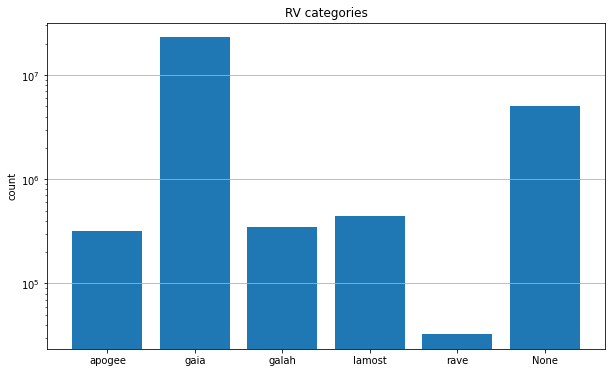

In [10]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

#### teff

In [11]:
df_teff_nan = gaia[gaia.teff.isnan()]
none = len(df_teff_nan)

df_teff = gaia.groupby('teff_cat', agg={'count': vaex.agg.count('teff_cat')})
df_teff = df_teff.to_pandas_df()
df_teff.at[0, 'count'] = none
df_teff.sort_values(by='teff_cat', ascending=True, inplace=True)
df_teff

,teff_cat,count
2,apogee,200347
1,galah,101845
3,gspphot,22476372
5,lamost,473520
4,rave,129947
0,None,5745300


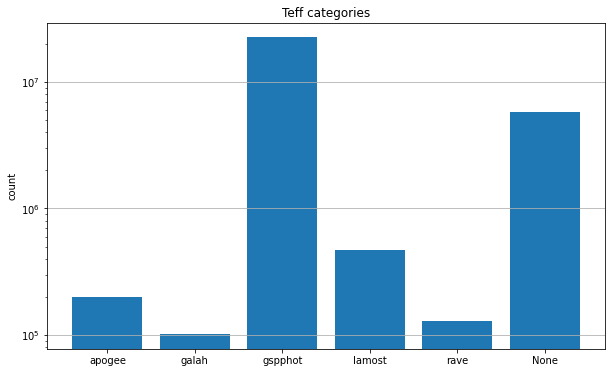

In [12]:
x = df_teff['teff_cat'].values.astype(str)
y = df_teff['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('Teff categories')
ax.yaxis.grid(True)
plt.show()

#### logg

In [13]:
df_logg_nan = gaia[gaia.logg.isnan()]
none = len(df_logg_nan)

df_logg = gaia.groupby('logg_cat', agg={'count': vaex.agg.count('logg_cat')})
df_logg = df_logg.to_pandas_df()
df_logg.at[0, 'count'] = none
df_logg.sort_values(by='logg_cat', ascending=True, inplace=True)
df_logg

,logg_cat,count
2,apogee,180381
1,galah,103126
3,gspphot,22611281
5,lamost,357287
4,rave,129947
0,None,5745309


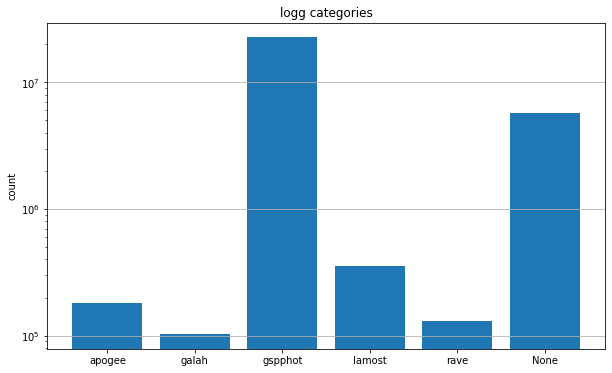

In [14]:
x = df_logg['logg_cat'].values.astype(str)
y = df_logg['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('logg categories')
ax.yaxis.grid(True)
plt.show()

#### feh

In [15]:
df_feh_nan = gaia[gaia.feh.isnan()]
none = len(df_feh_nan)

df_feh = gaia.groupby('feh_cat', agg={'count': vaex.agg.count('feh_cat')})
df_feh = df_feh.to_pandas_df()
df_feh.at[0, 'count'] = none
df_feh.sort_values(by='feh_cat', ascending=True, inplace=True)
df_feh

,feh_cat,count
2,apogee,370879
1,galah,342151
3,lamost,1493043
0,None,27664452


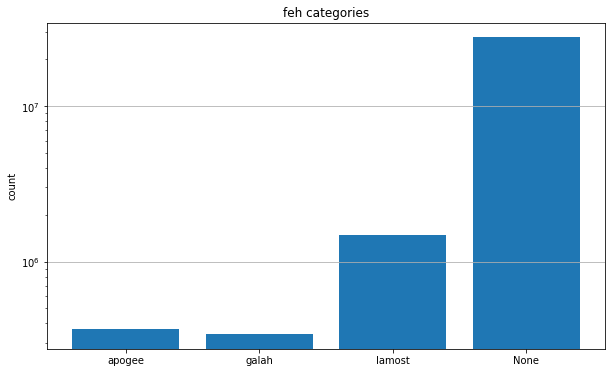

In [16]:
x = df_feh['feh_cat'].values.astype(str)
y = df_feh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('feh categories')
ax.yaxis.grid(True)
plt.show()

#### mh

In [17]:
df_mh_nan = gaia[gaia.mh.isnan()]
none = len(df_mh_nan)

df_mh = gaia.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh = df_mh.to_pandas_df()
df_mh.at[0, 'count'] = none
df_mh.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh

,mh_cat,count
2,apogee,223885
3,gspphot,22602183
1,gspspec,1875643
4,rave,9494
0,None,4416126


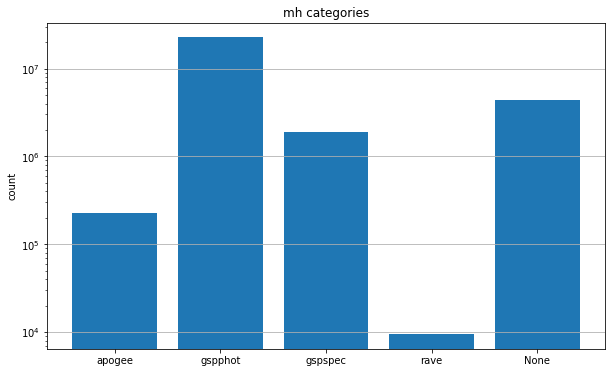

In [18]:
x = df_mh['mh_cat'].values.astype(str)
y = df_mh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('mh categories')
ax.yaxis.grid(True)
plt.show()


#### alpha

In [19]:
df_alpha_nan = gaia[gaia.alphafe.isnan()]
none = len(df_alpha_nan)

df_alpha = gaia.groupby('alphafe_cat', agg={'count': vaex.agg.count('alphafe_cat')})
df_alpha = df_alpha.to_pandas_df()
df_alpha.at[0, 'count'] = none
df_alpha.sort_values(by='alphafe_cat', ascending=True, inplace=True)
df_alpha

,alphafe_cat,count
1,galah,240865
2,gspspec,4054899
3,rave,50620
0,None,24780947


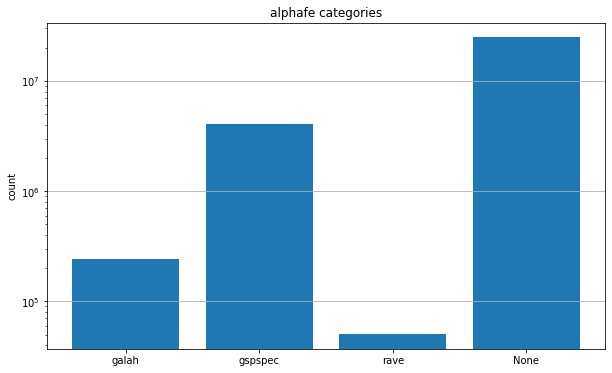

In [20]:
x = df_alpha['alphafe_cat'].values.astype(str)
y = df_alpha['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('alphafe categories')
ax.yaxis.grid(True)
plt.show()